In [1]:
import scanpy as sc
import squidpy as sq
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

from squidpy.pl._utils import save_fig

sc.logging.print_header()
sc.set_figure_params(facecolor="white", figsize=(8, 8))
sc.settings.verbosity = 3
sc.settings.dpi = 300
sq.__version__
sc.settings.figdir = "./figures"

%load_ext autoreload
%autoreload 2


/Users/hannah.spitzer/opt/miniconda3/envs/squidpy/lib/python3.8/site-packages/napari/__init__.py:44: UserWarning: 
    napari was tested with QT library `>=5.12.3`.
    The version installed is 5.9.7. Please report any issues with this
    specific QT version at https://github.com/Napari/napari/issues.
    
  warn(message=warn_message)


scanpy==1.6.1.dev70+g7f15d22d anndata==0.7.5 umap==0.4.6 numpy==1.19.4 scipy==1.5.3 pandas==1.1.4 scikit-learn==0.23.2 statsmodels==0.12.1 python-igraph==0.8.3 leidenalg==0.8.3


In [2]:
adata = sq.datasets.visium_hne_adata()

In [3]:
sq.gr.spatial_neighbors(adata)

Creating graph using `visium` coordinates and `None` transform
Adding `adata.obsp['spatial_connectivities']`
       `adata.uns['spatial_neighbors']`
Finish (0:00:00)


In [4]:
sq.gr.moran(adata, n_jobs=6)

In [5]:
fig, ax = plt.subplots(
    figsize=(3, 5),
)
g = "cluster"  # ["Nrgn", "Camk2n1", "Mobp", "cluster"]
sc.pl.spatial(
    adata,
    color=g,
    save=f"_moran_{g}.png",
    ax=ax,
    #     legend_loc=False,
    show=False,
)

In [6]:
sq.gr.ligrec(
    adata,
    cluster_key="cluster",
)

Fetching interactions from `omnipath`


/Users/hannah.spitzer/opt/miniconda3/envs/squidpy/lib/python3.8/site-packages/omnipath/_core/requests/interactions/_interactions.py:377: DtypeWarning: Columns (8) have mixed types.Specify dtype option on import or set low_memory=False.
  return cls(include, exclude=exclude)._get(**kwargs)


Fetched `8919` interactions
    Finish (0:00:06)
Running `1000` permutations on `2311` interactions and `225` cluster combinations using `1` core(s)


Adding `adata.uns['cluster_ligrec']`
Finish (0:00:31)


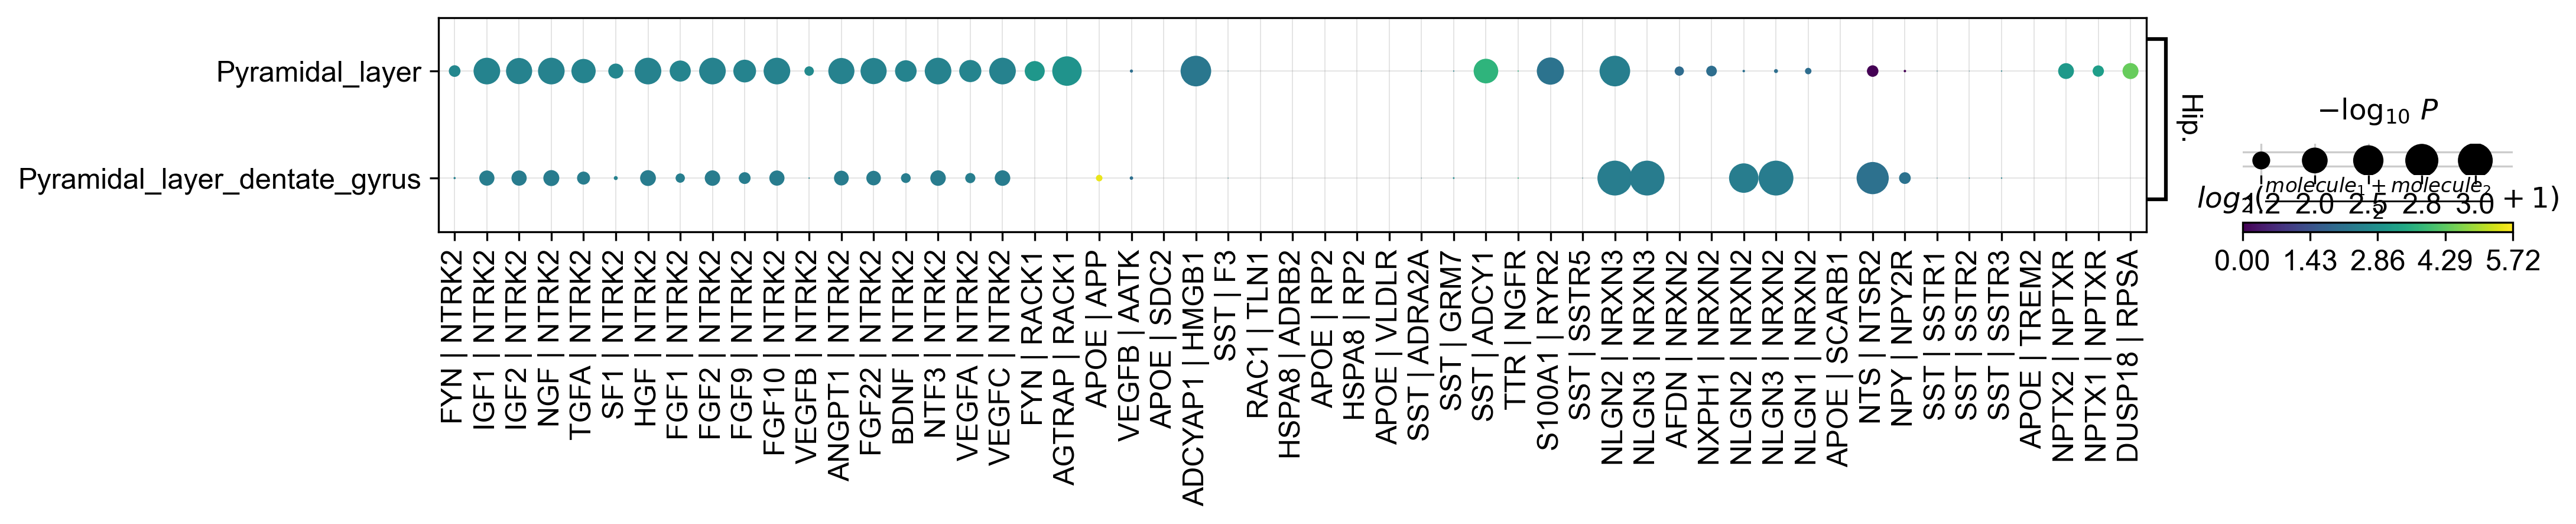

In [34]:
sq.pl.ligrec(
    adata,
    cluster_key="cluster",
    source_groups="Hippocampus",
    target_groups=["Pyramidal_layer", "Pyramidal_layer_dentate_gyrus"],
    means_range=(3, np.inf),
    alpha=1e-4,
    swap_axes=True,
    dpi=300,
    title="",
    figsize=(15, 1),
    y_padding=0.5,
    x_padding=0.5,
    width=2,
    save="ligrec_visium.png",
)